In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os 
import shutil
import glob


In [ ]:
train_dir = '/content/drive/MyDrive/Cat Data Set/cat_dataset/train'
val_dir = '/content/drive/MyDrive/Cat Data Set/cat_dataset/val'

In [ ]:
CLASS = ['Abyssinian' , 'Bengal' , 'Birman' , 'Bombay' , 'British_Shorthair' , 'Egyptian_Mau' , 
         'Maine_Coon' , 'Persian' , 'Ragdoll' , 'Russian_Blue' , 'Siamese' , 'Sphynx']

In [ ]:
for C in CLASS:
  DEST = os.path.join(train_dir , C)
    #if directory is not present then create one
  if not os.path.exists( DEST ):
    os.makedirs(DEST)

    for img_path in glob.glob(os.path.join(ORG_DIR , C) +"*"):
      SRC = img_path

      shutil.copy(SRC ,DEST)


In [ ]:
os.listdir("/content/drive/MyDrive/Cat Data Set/cat_dataset/train")

['Maine_Coon',
 'British_Shorthair',
 'Ragdoll',
 'Persian',
 'Siamese',
 'Sphynx',
 'Russian_Blue',
 'Egyptian_Mau',
 'Bombay',
 'Bengal',
 'Abyssinian',
 'Birman']

### Model **Building**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from keras.layers import Dense , Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
import keras

In [ ]:
base_model = InceptionV3(input_shape=(256 , 256 , 3) , include_top= False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units=12 , activation= 'sigmoid')(X)

#Final Model
model = Model(base_model.input , X)

#compile the model
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy , metrics = ['accuracy'])

#summery
model.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7fe6ad856d50>>

### Pre-Process data using Data **generator**

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center=True ,
                                   rotation_range= 0.4 , 
                                   width_shift_range= 0.3 , 
                                   horizontal_flip= True , 
                                   preprocessing_function=preprocess_input ,
                                   zoom_range=0.4  ,
                                   shear_range=0.4)
train_data = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/Cat Data Set/cat_dataset/train",
                                               target_size = (256 , 256 ) , 
                                               batch_size = 64)


Found 1680 images belonging to 12 classes.


In [ ]:
train_data.class_indices


{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11}

### Visualizing the **Data**

In [ ]:
t_img, label = train_data.next()
t_img

array([[[[ 9.92156863e-01,  9.92156863e-01,  9.92156863e-01],
         [ 9.92156863e-01,  9.92156863e-01,  9.92156863e-01],
         [ 9.92156863e-01,  9.92156863e-01,  9.92156863e-01],
         ...,
         [ 9.92156863e-01,  9.92156863e-01,  9.92156863e-01],
         [ 9.92156863e-01,  9.92156863e-01,  9.92156863e-01],
         [ 9.92156863e-01,  9.92156863e-01,  9.92156863e-01]],

        [[ 9.92156863e-01,  9.92156863e-01,  9.92156863e-01],
         [ 9.92156863e-01,  9.92156863e-01,  9.92156863e-01],
         [ 9.92156863e-01,  9.92156863e-01,  9.92156863e-01],
         ...,
         [ 9.92156863e-01,  9.92156863e-01,  9.92156863e-01],
         [ 9.92156863e-01,  9.92156863e-01,  9.92156863e-01],
         [ 9.92156863e-01,  9.92156863e-01,  9.92156863e-01]],

        [[ 9.92156863e-01,  9.92156863e-01,  9.92156863e-01],
         [ 9.92156863e-01,  9.92156863e-01,  9.92156863e-01],
         [ 9.92156863e-01,  9.92156863e-01,  9.92156863e-01],
         ...,
         [ 9.92156863e-0

In [ ]:
t_img.shape

(64, 256, 256, 3)

In [ ]:
def plotImage(img_arr , label):
  """
  input : image array
  output: plot images
  """

  for idx , img in enumerate(img_arr):
    if idx<= 10 :
      plt.figure(figsize = (5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


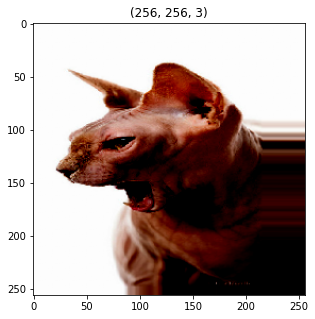

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


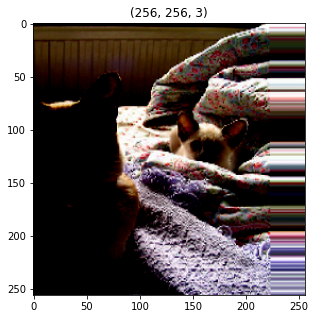

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


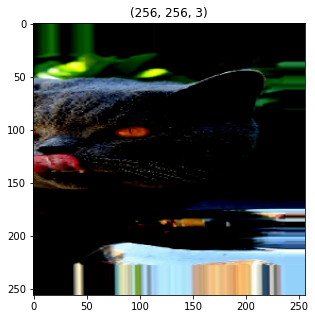

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


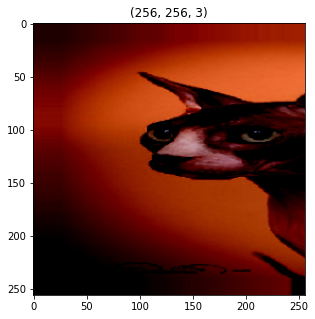

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


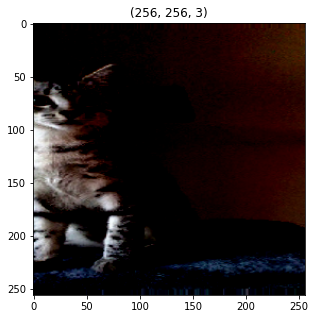

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


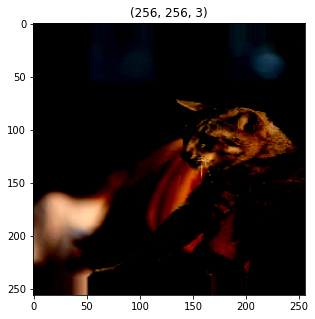

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


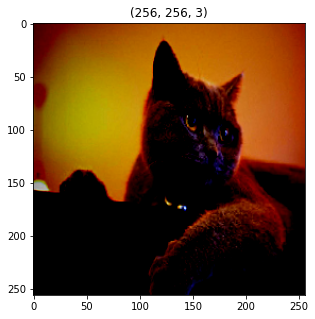

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


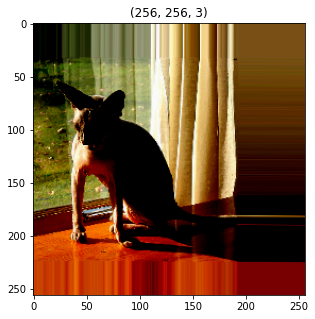

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


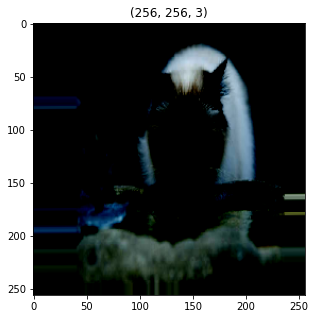

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


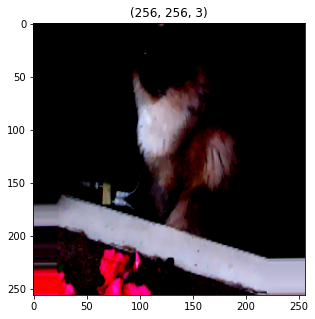

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


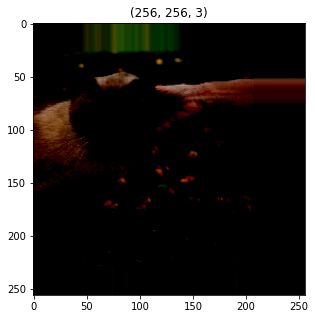

In [ ]:
plotImage(t_img , label)

### Model Check **Point**

In [ ]:
from keras.callbacks import ModelCheckpoint , EarlyStopping

mc = ModelCheckpoint(filepath = "./best_model.h5",
                     monitor = "accuracy",
                     verbose = 1,
                     save_best_only = True)

es = EarlyStopping(monitor = "accuracy",
                   min_delta = 0.01,
                   patience = 5,
                   verbose = 1)

cb = [mc,es]

In [ ]:
his = model.fit_generator(train_data,
                          steps_per_epoch = 10,
                          epochs = 30,
                          callbacks = cb)

Epoch 1/30
10/10 [==============================] - 162s 12s/step - loss: 2.8464 - accuracy: 0.1875

Epoch 00001: accuracy improved from -inf to 0.18750, saving model to ./best_model.h5
Epoch 2/30
10/10 [==============================] - 87s 9s/step - loss: 1.1104 - accuracy: 0.4672

Epoch 00002: accuracy improved from 0.18750 to 0.46719, saving model to ./best_model.h5
Epoch 3/30
10/10 [==============================] - 49s 5s/step - loss: 0.5399 - accuracy: 0.6531

Epoch 00003: accuracy improved from 0.46719 to 0.65312, saving model to ./best_model.h5
Epoch 4/30
10/10 [==============================] - 36s 4s/step - loss: 0.3265 - accuracy: 0.7531

Epoch 00004: accuracy improved from 0.65312 to 0.75313, saving model to ./best_model.h5
Epoch 5/30
10/10 [==============================] - 30s 3s/step - loss: 0.2551 - accuracy: 0.7906

Epoch 00005: accuracy improved from 0.75313 to 0.79062, saving model to ./best_model.h5
Epoch 6/30
10/10 [==============================] - 21s 2s/step - 

In [ ]:
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

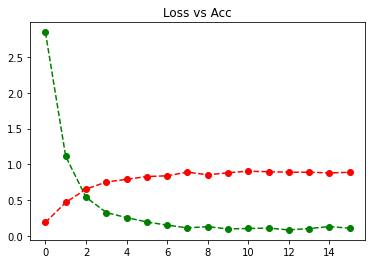

In [ ]:
plt.plot(h['loss'] , 'go--', c = "green"  )
plt.plot(h['accuracy'] ,'go--', c = "red"  )

plt.title("Loss vs Acc")
plt.show()

### Validate Our **Model**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The cat is of Maine_Coon


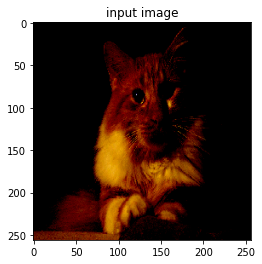

In [ ]:
# path for the image to see if it predict correct class

path = "/content/drive/MyDrive/Cat Data Set/cat_dataset/val/Maine_Coon/Maine_Coon_169.jpg"

img = load_img(path , target_size=(256 , 256))

i = img_to_array(img)

i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred == 0:
  print("The cat is of Abyssinian")
elif pred == 1:
    print("The cat is of Bengal")
elif pred == 2:
    print("The cat is of Birman")
elif pred == 3:
    print("The cat is of Bombay")
elif pred == 4:
    print("The cat is of British_Shorthair")
elif pred == 5:
    print("The cat is of Egyptian_Mau")
elif pred == 6:
    print("The cat is of Maine_Coon")
elif pred == 7:
    print("The cat is of Persian")
elif pred == 8:
    print("The cat is of Ragdoll")
elif pred == 9:
    print("The cat is of Russian_Blue")
elif pred == 10:
    print("The cat is of Siamese")
else:
  print("The cat is of Sphynx")


#to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.axis = False
plt.show()


### GRAD-**CAM**

In [ ]:
def get_img_arr(img_path):
  """
  Input : Take's in image path
  Output : Gives pre-process img
  """

  img = load_img(img_path , target_size=(256 , 256))
  
  img = img_to_array(img)
  
  image_prediction_and_visualization = preprocess_input(img)
 
  #expand the dimension
  img = np.array([img])
  
  return img

In [ ]:
import tensorflow as tf


In [ ]:
def make_gradcam_heatmap(img_arr , model , last_conv_layer_name , pred_index = None):
  grad_model = tf.keras.models.Model(
      [model.input] , [model.get_layer(last_conv_layer_name).output , model.output]
  )

  with tf.GradientTape() as tape:
    last_conv_layer_output , preds = grad_model(img_arr)
    if pred_index is None:
      pred_index = tf.argmax(preds[0])
    class_channel = preds[:,pred_index]

  grads = tape.gradient(class_channel , last_conv_layer_output)

  pooled_grads = tf.reduce_mean(grads , axis=(0,1,2))

  last_conv_layer_output = last_conv_layer_output[0]
  heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
  heatmap = tf.squeeze(heatmap)

  heatmap = tf.maximum(heatmap , 0)/tf.math.reduce_max(heatmap)
  return heatmap.numpy()

MAsk Heatmap on **Image**

In [ ]:
import matplotlib.cm as cm
from IPython.display import Image , display

In [ ]:
def save_and_display_gradcam(img_path , heatmap , cam_path = "cam.jpg" , alpha = 0.4):
      img = img_to_array(load_img(img_path))

      heatmap = np.uint8(255*heatmap)

      jet = cm.get_cmap("jet")

      jet_colors = jet(np.arange(256))[:, :3]
      jet_heatmap = jet_colors[heatmap]

      jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
      jet_heatmap = jet_heatmap.resize((img.shape[1] , img.shape[0]))
      jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

      superimposed_img = jet_heatmap * alpha + img
      superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

      superimposed_img.save(cam_path)

      display(Image(cam_path))

In [ ]:
def image_prediction_and_visualization(path , last_conv_layer_name = "conv2d_93" , model = model):
    """
    input : is the image path, name of last convolution layer , model name
    output : return the predictions and the area that is affected
    """

    img_array = get_img_arr(path)

    heatmap = make_gradcam_heatmap(img_array , model , last_conv_layer_name)

    plt.title("The heatmap of the image is ")
    plt.imshow(heatmap)
    plt.show()

    pred = np.argmax(model.predict(preprocess_input(img_array)))
    print()
    print()
    print(pred)
    if pred == 0:
      print("The cat is of Abyssinian")
    elif pred == 1:
      print("The cat is of Bengal")
    elif pred == 2:
      print("The cat is of Birman")
    elif pred == 3:
      print("The cat is of Bombay")
    elif pred == 4:
      print("The cat is of British_Shorthair")
    elif pred == 5:
      print("The cat is of Egyptian_Mau")
    elif pred == 6:
      print("The cat is of Maine_Coon")
    elif pred == 7:
      print("The cat is of Persian")
    elif pred == 8:
      print("The cat is of Ragdoll")
    elif pred == 9:
      print("The cat is of Russian_Blue")
    elif pred == 10:
      print("The cat is of Siamese")
    else:
      print("The cat is of Sphynx")



    print()
    print()
    print()
    print("image with heatmap representing region on interest")

    #function call
    save_and_display_gradcam(path,heatmap)

    print()
    print("The original input image")
    print()

    a = plt.imread(path)
    plt.imshow(a, cmap = "gray")
    plt.title("original image")
    plt.show()


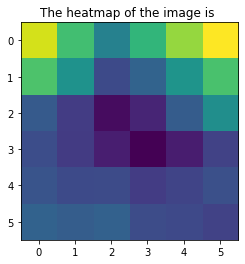



11
The cat is of Sphynx



image with heatmap representing region on interest


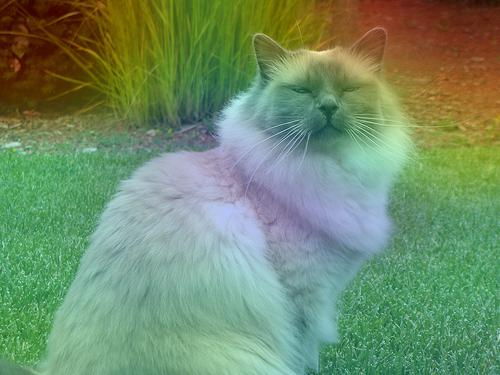


The original input image



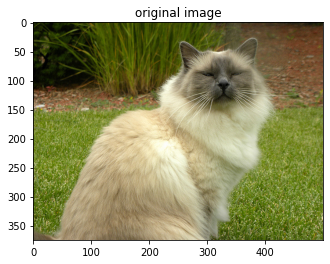

In [ ]:
#predictions
#provide the path of any image from google or any other sources
#the path is already defined above , but you can also provide the path here to avoid scrolling up

path = "/content/drive/MyDrive/Cat Data Set/cat_dataset/val/Birman/Birman_144.jpg"

image_prediction_and_visualization(path)